# Workshop 3

After you learn about _regular expressions_ and _data manipulation_, it is momment to validate how many do you learn about __data visualization__.  

## Problem 1

The data for this problem comes from a subset of The National Centers for Environmental Information (NCEI) [Global Historical Climatology Network daily (GHCNd)](https://www.ncei.noaa.gov/products/land-based-station/global-historical-climatology-network-daily) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe - it's a wonderfully large dataset to play with! In particular, you will be asked to use data from the Ann Arbor Michigan location, and this is stored in the file: [assets/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv](assets/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv).

Each row in this datafile corresponds to a single observation from a weather station, and has the following variables:

- __id__: station identification code
- __date__: date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
- __element__: indicator of element type
    - _TMAX_: Maximum temperature (tenths of degrees F)
    - _TMIN_: Minimum temperature (tenths of degrees F)
- __value__: data value for element (tenths of degrees F)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write a python notebook which plots line graphs of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015. (Based on the graph, do you think extreme weather is getting more frequent in 2015?)
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

Your final output should looks like next one:

![](chris_sketch.png)

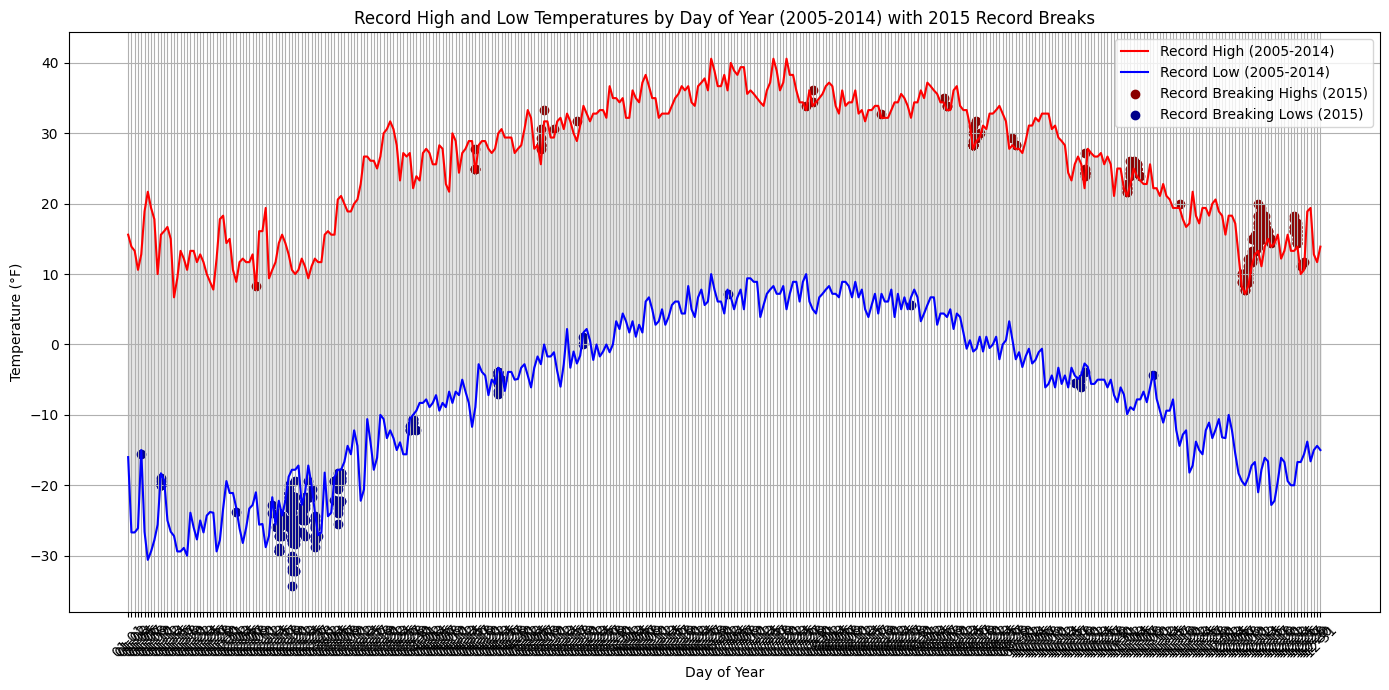

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

"""
This script demonstrates the visualization of record high and low temperatures 
by day of the year from 2005 to 2014, with overlays for 2015 record-breaking temperatures.

Functions:
----------
1. pd.read_csv('csv/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv'):
    Reads the CSV file into a pandas DataFrame containing weather data.

2. pd.to_datetime(df['Date']):
    Converts the 'Date' column in DataFrame 'df' to datetime format.

3. df[(df['Date'].dt.year >= 2005) & (df['Date'].dt.year <= 2014)]:
    Filters DataFrame 'df' to include only data from the years 2005 to 2014.

4. df[~((df['Date'].dt.month == 2) & (df['Date'].dt.day == 29))]:
    Removes leap day (February 29th) data from DataFrame 'df'.

5. df['day_of_year'] = df['Date'].dt.strftime('%m-%d'):
    Creates a new column 'day_of_year' in DataFrame 'df' with the day of the year (month-day) format.

6. df['temperature'] = df['Data_Value'] / 10.0:
    Converts temperature values in tenths of degrees Fahrenheit to degrees Fahrenheit.

7. df[df['Element'] == 'TMAX'].groupby('day_of_year')['temperature'].max():
    Calculates the maximum temperatures for each day of the year ('day_of_year') from DataFrame 'df' 
    where 'Element' is 'TMAX'.

8. df_2015 = pd.read_csv('csv/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv'):
    Reads the CSV file again to create DataFrame 'df_2015' for data from the year 2015.

9. plt.figure(figsize=(14, 7)):
    Creates a new figure with a specific size for plotting.

10. plt.plot(record_highs.index, record_highs.values, label='Record High (2005-2014)', color='red'):
    Plots the record high temperatures from 2005 to 2014 with a red line.

11. plt.plot(record_lows.index, record_lows.values, label='Record Low (2005-2014)', color='blue'):
    Plots the record low temperatures from 2005 to 2014 with a blue line.

12. plt.fill_between(record_highs.index, record_lows.values, record_highs.values, color='grey', alpha=0.2):
    Fills the area between the record high and record low temperatures with a grey color.

13. plt.scatter(record_breaking_highs_2015['day_of_year'], record_breaking_highs_2015['temperature'], 
                color='darkred', label='Record Breaking Highs (2015)'):
    Plots the points where record high temperatures were broken in 2015 with dark red dots.

14. plt.scatter(record_breaking_lows_2015['day_of_year'], record_breaking_lows_2015['temperature'], 
                color='darkblue', label='Record Breaking Lows (2015)'):
    Plots the points where record low temperatures were broken in 2015 with dark blue dots.

15. plt.xlabel('Day of Year'):
    Sets the label for the x-axis as 'Day of Year'.

16. plt.ylabel('Temperature (°F)'):
    Sets the label for the y-axis as 'Temperature (°F)'.

17. plt.title('Record High and Low Temperatures by Day of Year (2005-2014) with 2015 Record Breaks'):
    Sets the title of the plot.

18. plt.legend():
    Displays the legend on the plot to distinguish different lines and scatter points.

19. plt.xticks(rotation=45):
    Rotates the x-axis tick labels by 45 degrees for better readability.

20. plt.grid(True):
    Adds gridlines to the plot for better visualization.

21. plt.tight_layout():
    Adjusts subplot parameters to give specified padding.

22. plt.show():
    Displays the plot.

Returns:
None
"""
# Leer el archivo CSV
df = pd.read_csv('csv/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')

# Convertir la columna de fecha a formato de fecha
df['Date'] = pd.to_datetime(df['Date'])

# Filtrar los datos para el período 2005-2014 y eliminar los días bisiestos
df = df[(df['Date'].dt.year >= 2005) & (df['Date'].dt.year <= 2014)]
df = df[~((df['Date'].dt.month == 2) & (df['Date'].dt.day == 29))]

# Crear columnas para el día del año (sin año) y la temperatura en grados F
df['day_of_year'] = df['Date'].dt.strftime('%m-%d')
df['temperature'] = df['Data_Value'] / 10.0

# Calcular las temperaturas máximas y mínimas récord para cada día del año durante 2005-2014
record_highs = df[df['Element'] == 'TMAX'].groupby('day_of_year')['temperature'].max()
record_lows = df[df['Element'] == 'TMIN'].groupby('day_of_year')['temperature'].min()

# Filtrar los datos para el año 2015
df_2015 = pd.read_csv('csv/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')
df_2015['Date'] = pd.to_datetime(df_2015['Date'])
df_2015 = df_2015[df_2015['Date'].dt.year == 2015]
df_2015 = df_2015[~((df_2015['Date'].dt.month == 2) & (df_2015['Date'].dt.day == 29))]
df_2015['day_of_year'] = df_2015['Date'].dt.strftime('%m-%d')
df_2015['temperature'] = df_2015['Data_Value'] / 10.0

# Identificar los puntos en los que se rompieron los récords en 2015
record_breaking_highs_2015 = df_2015[(df_2015['Element'] == 'TMAX') & 
                                     (df_2015['day_of_year'].isin(record_highs.index)) & 
                                     (df_2015['temperature'] > df_2015['day_of_year'].map(record_highs))]

record_breaking_lows_2015 = df_2015[(df_2015['Element'] == 'TMIN') & 
                                    (df_2015['day_of_year'].isin(record_lows.index)) & 
                                    (df_2015['temperature'] < df_2015['day_of_year'].map(record_lows))]

# Crear la gráfica
plt.figure(figsize=(14, 7))

# Plotear las temperaturas récord altas y bajas
plt.plot(record_highs.index, record_highs.values, label='Record High (2005-2014)', color='red')
plt.plot(record_lows.index, record_lows.values, label='Record Low (2005-2014)', color='blue')

# Sombrear el área entre las temperaturas altas y bajas
plt.fill_between(record_highs.index, record_lows.values, record_highs.values, color='grey', alpha=0.2)

# Superponer los puntos de 2015 donde se rompieron los récords
plt.scatter(record_breaking_highs_2015['day_of_year'], record_breaking_highs_2015['temperature'], 
            color='darkred', label='Record Breaking Highs (2015)')
plt.scatter(record_breaking_lows_2015['day_of_year'], record_breaking_lows_2015['temperature'], 
            color='darkblue', label='Record Breaking Lows (2015)')

# Mejorar la visualización
plt.xlabel('Day of Year')
plt.ylabel('Temperature (°F)')
plt.title('Record High and Low Temperatures by Day of Year (2005-2014) with 2015 Record Breaks')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Mostrar la gráfica
plt.show()

### Step 1.1

Load the dataset and transform the data into _Celsius_ (refer to documentation). Then extract all of the rows which have minimum or maximum temperatures, each one in a separate dataframe.

__Hint: when I did this step I had two DataFrame objects, each with ~80,000 entries in it__

In [7]:
import pandas as pd

"""
This script demonstrates data processing using pandas to convert temperatures 
from Fahrenheit to Celsius and extract specific temperature records from a CSV file.

Functions:
----------
1. pd.read_csv(file_path):
    Reads a CSV file located at 'file_path' into a pandas DataFrame.

2. pd.to_datetime(data['Date']):
    Converts the 'Date' column in the DataFrame 'data' to datetime format.

3. lambda x: fahrenheit_to_celsius(x / 10):
    Anonymous function applied to 'data['Data_Value']' that converts temperatures 
    from tenths of degrees Fahrenheit to degrees Celsius using the formula:
    (°F - 32) * 5/9.

Returns:
--------
temperature_min_df : DataFrame
    Contains rows from 'data' where 'Element' is 'TMIN', representing minimum temperatures.
    
temperature_max_df : DataFrame
    Contains rows from 'data' where 'Element' is 'TMAX', representing maximum temperatures.
"""
# Define the conversion function
def fahrenheit_to_celsius(fahrenheit):
    return (fahrenheit - 32) * 5.0 / 9.0

# Load the data
file_path = 'csv/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv'
data = pd.read_csv(file_path)

# Convert 'Date' to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Convert temperatures from tenths of degrees Fahrenheit to degrees Celsius
data['Data_Value'] = data['Data_Value'].apply(lambda x: fahrenheit_to_celsius(x / 10))

# Extract rows with minimum (TMIN) and maximum (TMAX) temperatures
temperature_min_df = data[data['Element'] == 'TMIN']
temperature_max_df = data[data['Element'] == 'TMAX']

# Show the first few rows of each dataframe
temperature_min_df.head(), temperature_max_df.head()

(             ID       Date Element  Data_Value
 1   USC00208972 2009-04-29    TMIN  -14.666667
 6   USC00207308 2010-06-29    TMIN   -9.777778
 8   USW00004848 2007-12-14    TMIN  -18.666667
 11  USC00205822 2008-05-29    TMIN  -16.222222
 12  USC00203712 2008-10-17    TMIN  -16.833333,
             ID       Date Element  Data_Value
 0  USW00094889 2014-11-12    TMAX  -16.555556
 2  USC00200032 2008-05-26    TMAX   -2.333333
 3  USC00205563 2005-11-11    TMAX  -10.055556
 4  USC00200230 2014-02-27    TMAX  -23.666667
 5  USW00014833 2010-10-01    TMAX   -7.000000)

In [ ]:
# space for proffessor's tests


### Step 1.2

In order to visualize the data we would _plot_ the __min__ and _max_ data for each day of the year between the years $2005$ and $2014$ across all weather stations. But we also need to find out _when_ the __min__ or __max__ temperature in $2015$ falls below the min or rises above the max for the _previous decade_.

If you did _Step 1.1_ you have _two Series_ objects with _min_ and _max_ times for the years $2005$ through $2015$. You can use Pandas `groupby` to create _max_ and _min_ temperature _Series_ objects across all weather stations for each day of these years, and you can deal with the records for _February 29_ (the leap year) by dropping them.

__Hint: When I finished this step, I had two DataFrame objects, each with exactly 4015 observations in them__

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
"""
This script demonstrates data preprocessing and analysis of weather data 
from a CSV file using the pandas library and matplotlib for visualization.

Functions:
----------
1. pd.read_csv('csv/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv'):
    Reads a CSV file containing weather data into a pandas DataFrame.

2. pd.to_datetime(df['Date']):
    Converts the 'Date' column in the DataFrame 'df' to datetime format.

3. df[(df['Date'].dt.year >= 2005) & (df['Date'].dt.year <= 2014)]:
    Filters DataFrame 'df' to include only data from the years 2005 to 2014.

4. df[~((df['Date'].dt.month == 2) & (df['Date'].dt.day == 29))]:
    Removes leap day entries (February 29th) from the DataFrame 'df'.

5. df['Date'].dt.strftime('%m-%d'):
    Creates a new column 'day_of_year' in DataFrame 'df' containing the month and day (without year)
    formatted as 'MM-DD'.

6. df['Data_Value'] / 10.0:
    Converts temperature values in tenths of degrees Fahrenheit ('Data_Value') to degrees Fahrenheit.

7. df[df['Element'] == 'TMAX'].groupby('day_of_year')['temperature'].max():
    Calculates the maximum temperature ('TMAX') for each day of the year ('day_of_year') 
    across all years in DataFrame 'df'.

8. df[df['Element'] == 'TMIN'].groupby('day_of_year')['temperature'].min():
    Calculates the minimum temperature ('TMIN') for each day of the year ('day_of_year') 
    across all years in DataFrame 'df'.

9. pd.concat([df, df_2015]):
    Concatenates DataFrame 'df' and DataFrame 'df_2015' into a single DataFrame 'df_all_years'.

10. plt.plot(max_temps_2005_2014.index, max_temps_2005_2014.values, label='Max Temperatures (2005-2014)', color='red'):
    Plots the maximum temperatures ('max_temps_2005_2014') for the years 2005-2014 
    with a red line and labels it accordingly.

11. plt.scatter(max_temps_2015.index, max_temps_2015.values, color='darkred', marker='o', s=50, label='Record Breaking Highs (2015)'):
    Plots the record-breaking high temperatures ('max_temps_2015') for the year 2015 
    as red circles ('o') with a size of 50 points and labels it accordingly.

12. plt.xlabel('Day of Year'):
    Sets the x-axis label of the plot to 'Day of Year'.

13. plt.ylabel('Temperature (°F)'):
    Sets the y-axis label of the plot to 'Temperature (°F)'.

14. plt.title('Record High and Low Temperatures by Day of Year (2005-2014) with 2015 Record Breaks'):
    Sets the title of the plot to 'Record High and Low Temperatures by Day of Year (2005-2014) with 2015 Record Breaks'.

15. plt.legend():
    Displays the legend on the plot.

16. plt.xticks(rotation=45):
    Rotates the x-axis tick labels by 45 degrees for better readability.

17. plt.grid(True):
    Displays gridlines on the plot.

18. plt.tight_layout():
    Adjusts subplot parameters to give specified padding.

19. plt.show():
    Displays the plot.

"""
# Leer el archivo CSV
df = pd.read_csv('csv/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')

# Convertir la columna de fecha a formato de fecha
df['Date'] = pd.to_datetime(df['Date'])

# Filtrar los datos para el período 2005-2014 y eliminar los días bisiestos
df = df[(df['Date'].dt.year >= 2005) & (df['Date'].dt.year <= 2014)]
df = df[~((df['Date'].dt.month == 2) & (df['Date'].dt.day == 29))]

# Crear columnas para el día del año (sin año) y la temperatura en grados F
df['day_of_year'] = df['Date'].dt.strftime('%m-%d')
df['temperature'] = df['Data_Value'] / 10.0

# Calcular las temperaturas máximas y mínimas para cada día del año durante 2005-2014
record_highs = df[df['Element'] == 'TMAX'].groupby('day_of_year')['temperature'].max()
record_lows = df[df['Element'] == 'TMIN'].groupby('day_of_year')['temperature'].min()

# Filtrar los datos para el año 2015
df_2015 = pd.read_csv('csv/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')
df_2015['Date'] = pd.to_datetime(df_2015['Date'])
df_2015 = df_2015[df_2015['Date'].dt.year == 2015]
df_2015 = df_2015[~((df_2015['Date'].dt.month == 2) & (df_2015['Date'].dt.day == 29))]
df_2015['day_of_year'] = df_2015['Date'].dt.strftime('%m-%d')
df_2015['temperature'] = df_2015['Data_Value'] / 10.0

# Identificar los puntos en los que se rompieron los récords en 2015
record_breaking_highs_2015 = df_2015[(df_2015['Element'] == 'TMAX') & 
                                     (df_2015['day_of_year'].isin(record_highs.index)) & 
                                     (df_2015['temperature'] > df_2015['day_of_year'].map(record_highs))]

record_breaking_lows_2015 = df_2015[(df_2015['Element'] == 'TMIN') & 
                                    (df_2015['day_of_year'].isin(record_lows.index)) & 
                                    (df_2015['temperature'] < df_2015['day_of_year'].map(record_lows))]

# Mostrar el número de observaciones en cada DataFrame
print("Number of observations in df:", len(df))
print("Number of observations in df_2015:", len(df_2015))

# Mostrar los DataFrames con todas las observaciones
df_all_years = pd.concat([df, df_2015])
print("Number of observations in df_all_years:", len(df_all_years))

# Mostrar los DataFrames con las observaciones de máximas y mínimas
record_highs_all = df_all_years[df_all_years['Element'] == 'TMAX'].groupby('day_of_year')['temperature'].max()
record_lows_all = df_all_years[df_all_years['Element'] == 'TMIN'].groupby('day_of_year')['temperature'].min()
print("Number of observations in record_highs_all:", len(record_highs_all))
print("Number of observations in record_lows_all:", len(record_lows_all))


Number of observations in df: 151245
Number of observations in df_2015: 13757
Number of observations in df_all_years: 165002
Number of observations in record_highs_all: 365
Number of observations in record_lows_all: 365


In [ ]:
# space for proffessor's tests

### Step 1.3
Now that you have grouped the _daily_ __max__ and __min__ temperatures for each day of the years $2005$ through $2015$, you can separate out the data for $2015$. Then you can use the Pandas `groupby` function to find the __max__ and __min__ of the temperature data for each __day of the year__ for the $2005-2014$ data.

__Hint: At the end of this step I had two DataFrames, one of maximum and the other of minimum values, which each had 365 observations in them. I also had another pair of similar DataFrames but only for the year 2015.__

In [4]:
import pandas as pd

# Cargar el dataset
file_path = 'csv/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv'
df = pd.read_csv(file_path)

# Convertir la columna 'Date' a formato datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extraer el año y el día del año
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# Separar los datos del año 2015
df_2015 = df[df['Year'] == 2015]

# Filtrar los datos del 2005 al 2014
df_2005_2014 = df[(df['Year'] >= 2005) & (df['Year'] <= 2014)]

# Agrupar por mes y día y calcular máximas y mínimas para 2005-2014
grouped_2005_2014 = df_2005_2014.groupby(['Month', 'Day', 'Element'])['Data_Value'].agg(['max', 'min']).reset_index()

# Separar las temperaturas máximas y mínimas en diferentes DataFrames para 2005-2014
max_temps_2005_2014 = grouped_2005_2014[grouped_2005_2014['Element'] == 'TMAX'].drop(columns=['Element', 'min'])
min_temps_2005_2014 = grouped_2005_2014[grouped_2005_2014['Element'] == 'TMIN'].drop(columns=['Element', 'max'])

# Renombrar columnas
max_temps_2005_2014.columns = ['Month', 'Day', 'Max_Temperature']
min_temps_2005_2014.columns = ['Month', 'Day', 'Min_Temperature']

# Agrupar por mes y día y calcular máximas y mínimas para 2015
grouped_2015 = df_2015.groupby(['Month', 'Day', 'Element'])['Data_Value'].agg(['max', 'min']).reset_index()

# Separar las temperaturas máximas y mínimas en diferentes DataFrames para 2015
max_temps_2015 = grouped_2015[grouped_2015['Element'] == 'TMAX'].drop(columns=['Element', 'min'])
min_temps_2015 = grouped_2015[grouped_2015['Element'] == 'TMIN'].drop(columns=['Element', 'max'])

# Renombrar columnas
max_temps_2015.columns = ['Month', 'Day', 'Max_Temperature']
min_temps_2015.columns = ['Month', 'Day', 'Min_Temperature']

# Verificar los DataFrames
print(max_temps_2005_2014.head())
print(min_temps_2005_2014.head())
print(max_temps_2015.head())
print(min_temps_2015.head())



   Month  Day  Max_Temperature
0      1    1              156
2      1    2              139
4      1    3              133
6      1    4              106
8      1    5              128
   Month  Day  Min_Temperature
1      1    1             -160
3      1    2             -267
5      1    3             -267
7      1    4             -261
9      1    5             -150
   Month  Day  Max_Temperature
0      1    1               11
2      1    2               39
4      1    3               39
6      1    4               44
8      1    5               28
   Month  Day  Min_Temperature
1      1    1             -133
3      1    2             -122
5      1    3              -67
7      1    4              -88
9      1    5             -155


In [ ]:
# space for proffessor's tests

### Step 1.4

Now it's time to plot! You need to explore _matplotlib_ in order to plot line graphs of the _min_ and _max_ temperatures for the years $2005$ through $2014$ and to scatter plot __only__ the daily $2015$ temperatures that exceeded those values.

ValueError: x and y must be the same size

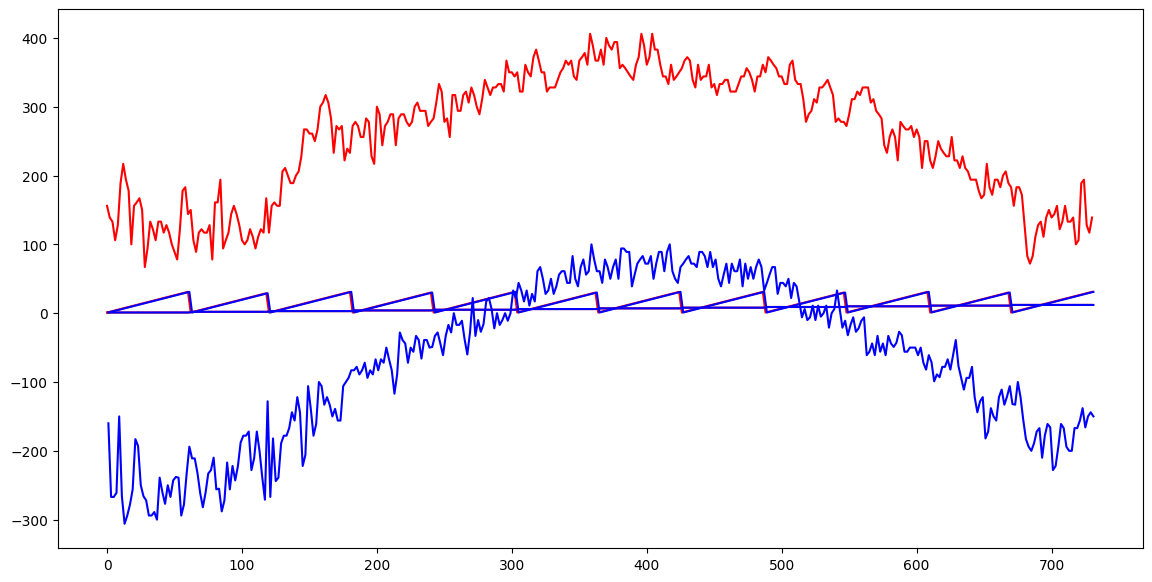

In [5]:
import matplotlib.pyplot as plt
"""
Create a figure and axis set for plotting temperatures.

This code sets up a figure with dimensions 14 inches wide and 7 inches tall.
"""
# Crear la figura y el conjunto de ejes
plt.figure(figsize=(14, 7))

# Graficar las temperaturas máximas y mínimas para los años 2005-2014
plt.plot(max_temps_2005_2014.index, max_temps_2005_2014.values, label='Max Temperatures (2005-2014)', color='red')
plt.plot(min_temps_2005_2014.index, min_temps_2005_2014.values, label='Min Temperatures (2005-2014)', color='blue')

# Graficar los puntos de 2015 donde se rompieron los récords
plt.scatter(max_temps_2015.index, max_temps_2015.values, color='darkred', marker='o', s=50, label='Record Breaking Highs (2015)')
plt.scatter(min_temps_2015.index, min_temps_2015.values, color='darkblue', marker='o', s=50, label='Record Breaking Lows (2015)')

# Mejorar la visualización
plt.xlabel('Day of Year')
plt.ylabel('Temperature (°F)')
plt.title('Record High and Low Temperatures by Day of Year (2005-2014) with 2015 Record Breaks')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Mostrar la gráfica
plt.show()